In [1]:
import pandas
from matplotlib import pyplot, font_manager, rc
from numpy import nan
import seaborn

## 한글 폰트 불러오기

In [2]:
font_path = 'malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

## 데이터 불러오고 다중인덱스 설정하기

In [35]:
df = pandas.read_excel('남북한발전전력량.xls', header=0, index_col=(0,1)) 
df

1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  \
전력량 (억㎾h) 발전 전력별                                                               
남한        합계      1077  1186  1310  1444  1650  1847  2055  2244  2153  2393   
          수력        64    51    49    60    41    55    52    54    61    61   
          화력       484   573   696   803  1022  1122  1264  1420  1195  1302   
          원자력      529   563   565   581   587   670   739   771   897  1031   
          신재생        -     -     -     -     -     -     -     -     -     -   
북한        합계       277   263   247   221   231   230   213   193   170   186   
          수력       156   150   142   133   138   142   125   107   102   103   
          화력       121   113   105    88    93    88    88    86    68    83   
          원자력        -     -     -     -     -     -     -     -     -     -   

                  ...  2007  2008  2009  2010  2011  2012  2013  2014  2015  \
전력량 (억㎾h) 발전 전력별  ...                                                         
남한        합계      ...  4031  4224  4336  4747  4969  5096  5171  5220  5281   
          수력      ...    50    56    56    65    78    77    84    78    58   
          화력      ...  2551  2658  2802  3196  3343  3430  3581  3427  3402   
          원자력     ...  1429  1510  1478  1486  1547  1503  1388  1564  1648   
          신재생     ...     -     -     -     -     -    86   118   151   173   
북한        합계      ...   236   255   235   237   211   215   221   216   190   
          수력      ...   133   141   125   134   132   135   139   130   100   
          화력      ...   103   114   110   103    79    80    82    86    90   
          원자력     ...     -     -     -     -     -     -     -     -     -   

                  2016  
전력량 (억㎾h) 발전 전력별        
남한        합계      5404  
          수력        66  
          화력      3523  
          원자력     1620  
          신재생      195  
북한        합계       239  
          수력       128  
          화력       111  
          원자력        -  

[9 rows x 27 columns]

## 북한 관련 데이터(수력,화력)만 뽑아내기 index[5:9]

In [60]:
df_north = df.loc['북한']
df_north2 = df_north.loc[['수력','화력']]

df_north = df_north.transpose() # 그래프를 위해 위치 바꿔줌
df_north2 = df_north2.T

## 전년도 전력량 비교위해 새로운 컬럼 만들기

In [83]:
df_north['합계 - 1년'] = df_north['합계'].shift(1) # 데이터가 한칸씩 아래로 밀려서 저장됨
df_north['증감률'] = (df_north['합계'] / df_north['합계 - 1년']-1)*100 # 작년보다 몇 퍼센트 달라졌는지
df_north

발전 전력별,합계,수력,화력,원자력,합계 - 1년,증감률
1990,277,156,121,-,NaN,NaN
1991,263,150,113,-,277,-5.05415
1992,247,142,105,-,263,-6.08365
1993,221,133,88,-,247,-10.5263
1994,231,138,93,-,221,4.52489
1995,230,142,88,-,231,-0.4329
1996,213,125,88,-,230,-7.3913
1997,193,107,86,-,213,-9.38967
1998,170,102,68,-,193,-11.9171
1999,186,103,83,-,170,9.41176


## 북한 전력량 그래프 그리기

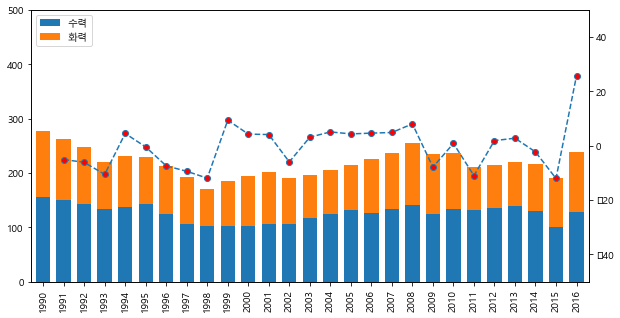

In [87]:
ax1 = df_north[['수력','화력']].plot(kind='bar', stacked=True, figsize=(10,5), width=0.7)

ax2 = ax1.twinx() # 그래프 모양 복제

ax2.plot(df_north['증감률'], ls = '--', marker='o', markerfacecolor='red') # 점선, 마커

ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)

ax1.legend(loc='upper left')

<BarContainer object of 27 artists>

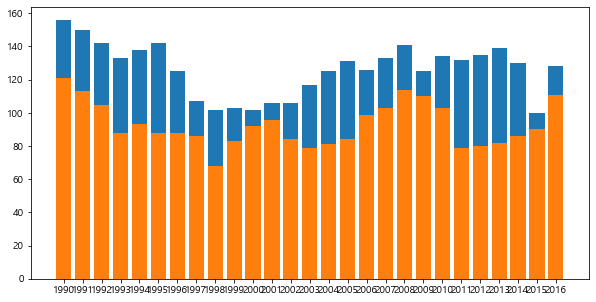

In [68]:
figure = pyplot.figure(figsize = (10,5))
ax = figure.add_subplot(1,1,1)
ax.bar(df_north2.index,df_north2['수력'].values)
ax.bar(df_north2.index,df_north2['화력'].values)